<div style="color: black; background-color: white; padding: 10px;">
    <h2 style="text-align:center;">CHICAGO REAL ESTATE DATA ANALYSIS</h2>
</div>

Goal: First python project, playing around with pandas and numpy and statistical analyses with a real estate chicago 2024 dataset from Kaggle.

<div style="color: black; background-color: white; padding: 10px;">
    <h3 style="text-align:center;">DATA SETUP</h3>
</div>

In [41]:
%pip install pandas
%pip install numpy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\krazi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\krazi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\krazi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load dataset

file_path = "C:/Users/krazi/Downloads/real_estate_data_chicago.csv"
df = pd.read_csv(file_path)

In [44]:
df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


<div style="color: black; background-color: white; padding: 10px;">
    <h3 style="text-align:center;">DATA CLEANING</h3>
</div>

In [45]:
# If the dataset contains 'NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?' values, replace with Null

df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           1940 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


In [47]:
# Define numerical and categorical variables

numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           

print('Numerical variables: ', numerical_vars)
print('Categorical variables: ', categorical_vars)

Numerical variables:  ['year_built', 'beds', 'baths', 'baths_full', 'baths_half', 'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice', 'listPrice']
Categorical variables:  ['type', 'text', 'soldOn', 'status']


In [48]:
# Number of categorical and numerical variables

numerical_count = df.select_dtypes(exclude='object').shape[1]
categorical_count = df.select_dtypes(include='object').shape[1]

print(f"Number of numerical variables: {numerical_count}")
print(f"Number of categorical variables: {categorical_count}")

Number of numerical variables: 11
Number of categorical variables: 4


In [49]:
# Summary statistics of all variables

df.describe(include="all").round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
type,2000,7,single_family,931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,1992,1981,Investors and home builders have a unique chan...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_built,1790.0,NaN,NaN,NaN,1946.05,38.99,1856.0,1916.0,1943.0,1970.75,2024.0
beds,1940.0,NaN,NaN,NaN,3.29,1.76,0.0,2.0,3.0,4.0,21.0
baths,1999.0,NaN,NaN,NaN,2.44,1.46,0.0,2.0,2.0,3.0,13.0
baths_full,1937.0,NaN,NaN,NaN,2.16,1.11,1.0,1.0,2.0,3.0,8.0
baths_half,592.0,NaN,NaN,NaN,1.19,0.55,1.0,1.0,1.0,1.0,5.0
garage,1282.0,NaN,NaN,NaN,2.13,11.37,1.0,1.0,2.0,2.0,400.0
lot_sqft,992.0,NaN,NaN,NaN,7156.21,68611.54,1.0,3125.0,3750.0,5013.0,2156000.0
sqft,1447.0,NaN,NaN,NaN,2069.91,1691.52,372.0,1170.0,1550.0,2355.0,25000.0


<div style="color: black; background-color: white; padding: 10px;">
    <h3 style="text-align:center;">EXPLORATORY DATA ANALYSIS (EDA)</h3>
</div>

<h5>Summary Statistics of Numeric Variables</h5>

In [50]:
df[numerical_vars].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
year_built,1790.0,1946.05,38.99,1856.0,1916.0,1943.0,1970.75,2024.0
beds,1940.0,3.29,1.76,0.0,2.0,3.0,4.00,21.0
baths,1999.0,2.44,1.46,0.0,2.0,2.0,3.00,13.0
baths_full,1937.0,2.16,1.11,1.0,1.0,2.0,3.00,8.0
baths_half,592.0,1.19,0.55,1.0,1.0,1.0,1.00,5.0
garage,1282.0,2.13,11.37,1.0,1.0,2.0,2.00,400.0
lot_sqft,992.0,7156.21,68611.54,1.0,3125.0,3750.0,5013.00,2156000.0
sqft,1447.0,2069.91,1691.52,372.0,1170.0,1550.0,2355.00,25000.0
stories,1620.0,7.18,13.04,1.0,2.0,2.0,4.00,119.0
lastSoldPrice,1415.0,368518.59,615689.56,600.0,111750.0,218000.0,395000.00,7500000.0


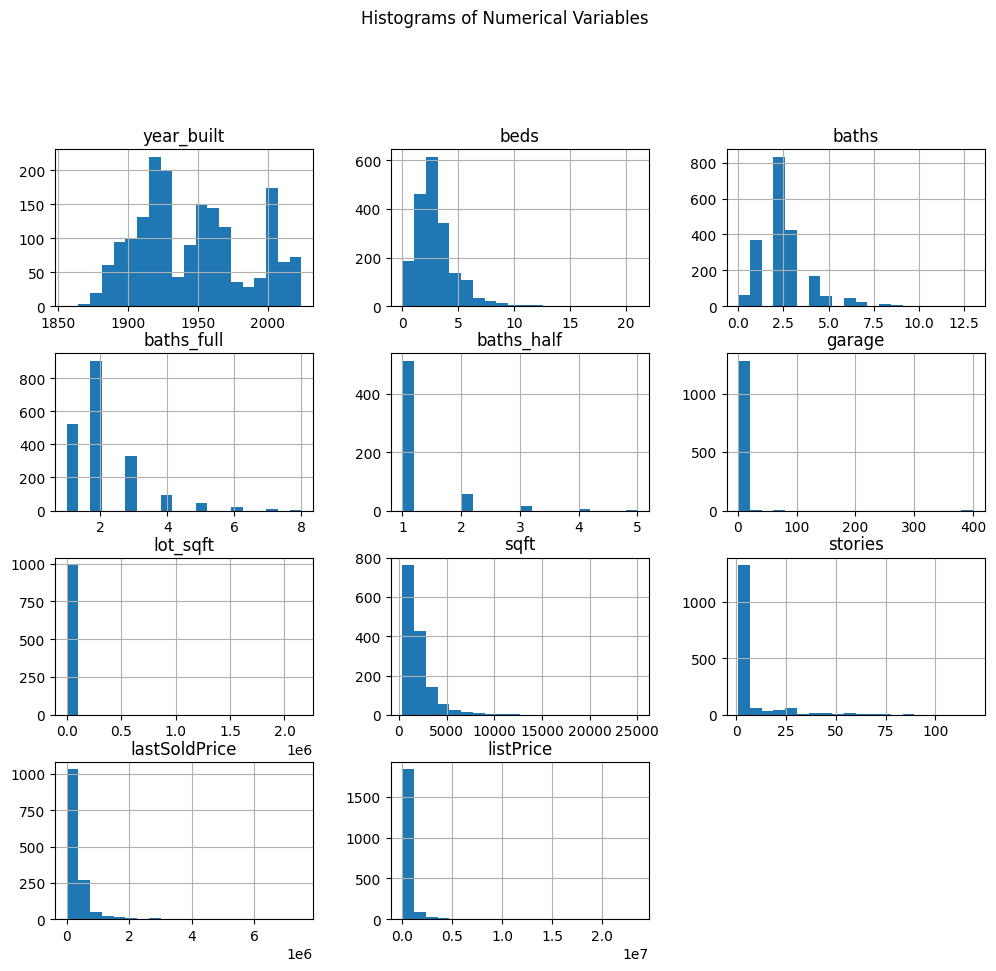

In [51]:
# Histograms of numerical variables

df[numerical_vars].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()

In [52]:
# Additional numeric statistics

variance = df[numerical_vars].var()
skewness = df[numerical_vars].skew()
kurtosis = df[numerical_vars].kurtosis()

print("Variance:\n", variance)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)

Variance:
 year_built       1.519901e+03
beds             3.092496e+00
baths            2.121364e+00
baths_full       1.224646e+00
baths_half       3.059405e-01
garage           1.292152e+02
lot_sqft         4.707543e+09
sqft             2.861234e+06
stories          1.699587e+02
lastSoldPrice    3.790736e+11
listPrice        1.445765e+12
dtype: float64
Skewness:
 year_built        0.330575
beds              1.844371
baths             1.762212
baths_full        1.664878
baths_half        3.605515
garage           33.752125
lot_sqft         31.075605
sqft              4.581711
stories           3.476504
lastSoldPrice     5.913011
listPrice         9.470699
dtype: float64
Kurtosis:
 year_built         -0.934944
beds                8.369857
baths               5.687855
baths_full          4.253704
baths_half         14.926312
garage           1175.482014
lot_sqft          973.779461
sqft               38.395363
stories            14.156527
lastSoldPrice      45.372318
listPrice         12

In [53]:
# Outlier detection using IQR method

Q1 = df[numerical_vars].quantile(0.25)
Q3 = df[numerical_vars].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_vars] < (Q1 - 1.5 * IQR)) | (df[numerical_vars] > (Q3 + 1.5 * IQR))).sum()

print("Outliers:\n", outliers)


Outliers:
 year_built         0
beds              52
baths            209
baths_full        14
baths_half        79
garage            28
lot_sqft          94
sqft             114
stories          273
lastSoldPrice     98
listPrice        166
dtype: int64


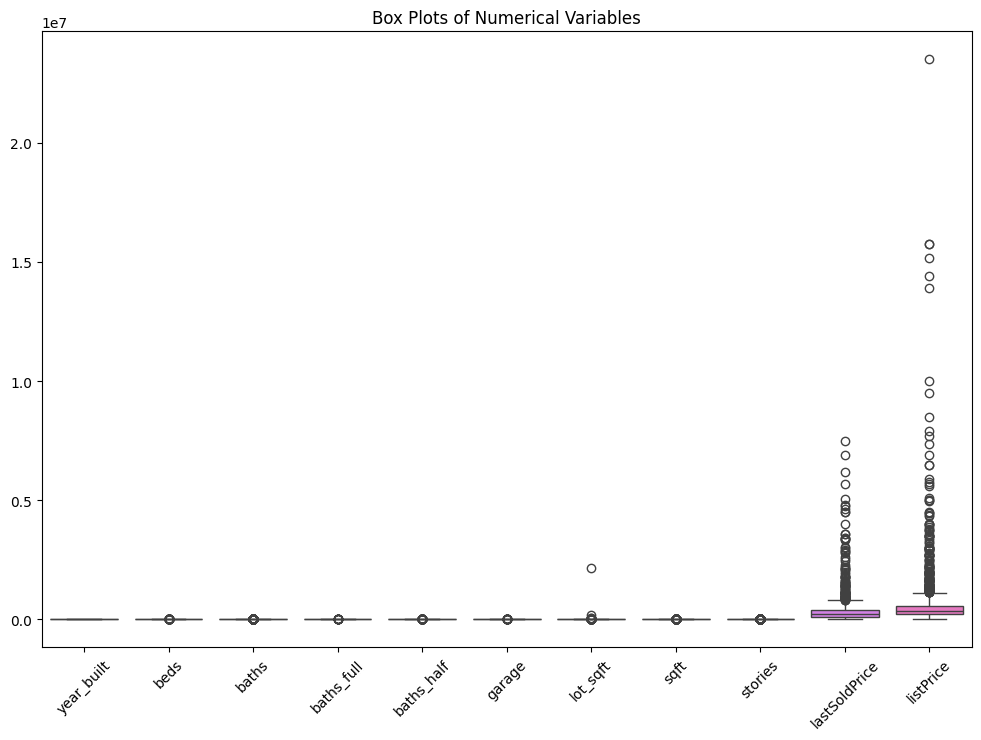

In [54]:
# Box plots to identify outliers and compare distributions

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_vars])
plt.title('Box Plots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

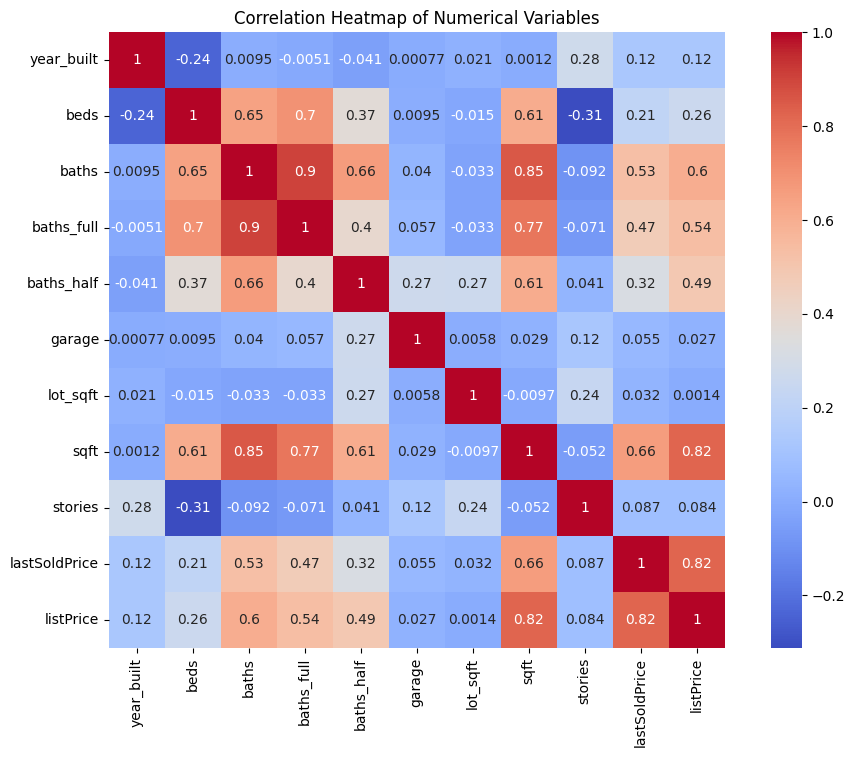

In [55]:
# Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_vars].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Analysis of Numerical Variables

- Central Tendency and Dispersion:

- Distribution and Outliers:

- Correlation:



--------------------------------------------------------------------------------------------------

<h5>Summary Statistics of Categorical Variables</h5>

In [56]:
for var in categorical_vars:
    print(f"\nFrequency counts for {var}:\n", df[var].value_counts())
    print(f"\nProportions for {var}:\n", df[var].value_counts(normalize=True))


Frequency counts for type:
 type
single_family    931
condos           716
multi_family     212
townhomes         78
land              60
mobile             2
apartment          1
Name: count, dtype: int64

Proportions for type:
 type
single_family    0.4655
condos           0.3580
multi_family     0.1060
townhomes        0.0390
land             0.0300
mobile           0.0010
apartment        0.0005
Name: proportion, dtype: float64

Frequency counts for text:
 text
Investors and home builders have a unique chance to purchase eight lots in the Fuller Park area of Chicago, either in bulk or separately from the same owners. All of the lots are suitable for building either a single-family house or two flat buildings. The location is less than 10 minutes away from downtown.                                                                                                                                                                                                                            

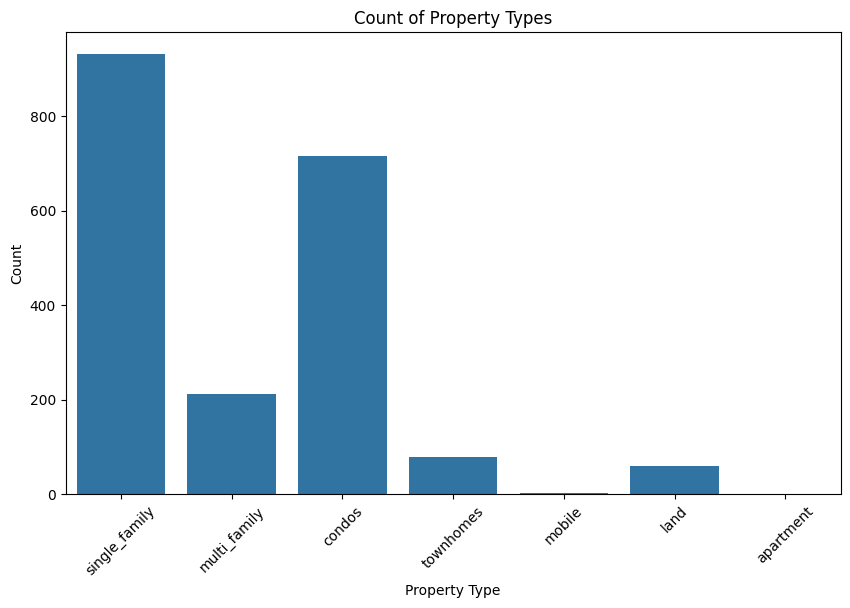

In [57]:
# Bar plot for property types

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Count of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Conclusion:

<div style="color: black; background-color: white; padding: 10px;">
    <h3 style="text-align:center;">VISUAL EXPLORATION</h3>
</div>

Multivariate Regression

In [ ]:
pip install scikit-learn

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Check for missing values
# print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Check if number of missing values is 0
# print(df.isnull().sum())

# Prepare data for modeling
X = df[['sqft', 'beds', 'baths', 'year_built']]
y = df['listPrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print('Coefficients:', model.coef_.round(2))
print('Intercept:', model.intercept_.round(2))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred).round(2))
print('R-squared:', r2_score(y_test, y_pred).round(2))

Coefficients: [   583.14 -59446.64  28457.97   5235.9 ]
Intercept: -10753555.39
Mean Squared Error: 329786980774.98
R-squared: 0.83


Conclusion:

--------------------------------------------------------------------------------------------------

Scatter Plot (Actual vs Predicted List Prices)

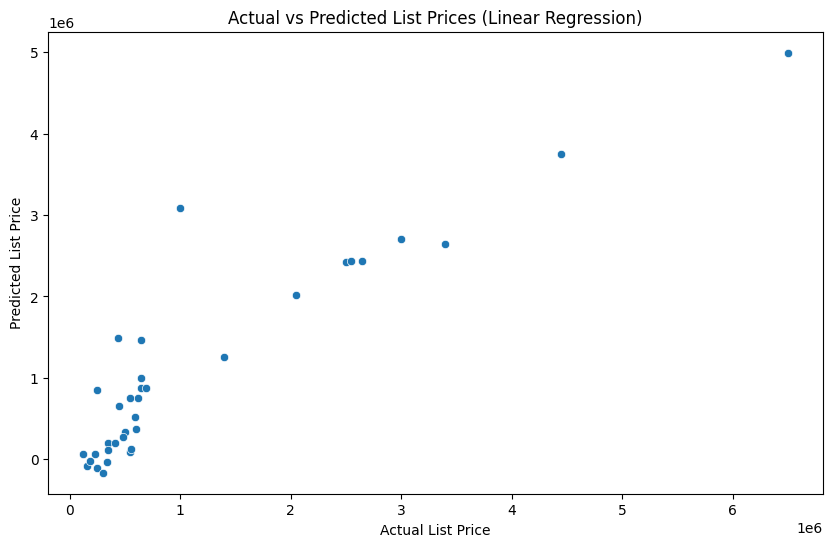

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted List Prices (Linear Regression)')
plt.xlabel('Actual List Price')
plt.ylabel('Predicted List Price')
plt.show()

Conclusion:

<div style="color: black; background-color: white; padding: 10px;">
    <h3 style="text-align:center;">DATA EXPLORATION CONT'D</h3>
</div>

Descriptive Analysis:

- What is the distribution of property types?
- What are the average, median, and range of listing prices (listPrice)?
- How do the number of bedrooms (beds) and bathrooms (baths) vary across different property types?
- What is the distribution of property sizes (sqft) and lot sizes (lot_sqft)?

In [67]:
# Distribution of property types
property_type_counts = df['type'].value_counts()
print("Distribution of property types:\n", property_type_counts)
print("\n")

# Summary statistics for listing prices
list_price_summary = df['listPrice'].describe().round(2)
print("Summary statistics for listing prices:\n", list_price_summary)
print("\n")

# Distribution of bedrooms and bathrooms by property type
bed_bath_distribution = df.groupby('type')[['beds', 'baths']].mean()
print("Distribution of bedrooms and bathrooms by property type\n", bed_bath_distribution)
print("\n")

# fix property types not displaying right
# Distribution of property sizes and lot sizes
property_lot_distribution = df.groupby('type')[['sqft', 'lot_sqft']].mean()
print("Distribution of property sizes and lot sizes\n", property_lot_distribution)

Distribution of property types:
 type
single_family    168
townhomes          5
Name: count, dtype: int64


Summary statistics for listing prices:
 count        173.00
mean     1210817.73
std      1542183.29
min        69900.00
25%       345000.00
50%       599990.00
75%      1275000.00
max      9995000.00
Name: listPrice, dtype: float64


Distribution of bedrooms and bathrooms by property type
                    beds  baths
type                          
single_family  4.029762  3.875
townhomes      2.600000  2.600


Distribution of property sizes and lot sizes
                       sqft     lot_sqft
type                                   
single_family  3296.113095  5745.982143
townhomes      1469.400000  2203.200000


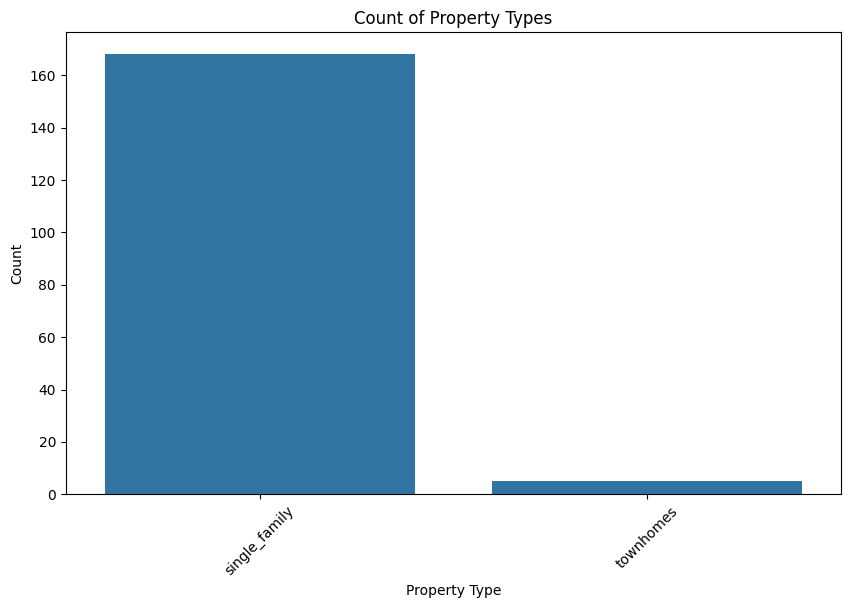

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Count of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

--------------------------------------------------------------------------------------------------

Temporal Trends:

- How have property prices (listPrice, lastSoldPrice) changed over time?
- Are there any seasonal patterns in property sales (soldOn)?

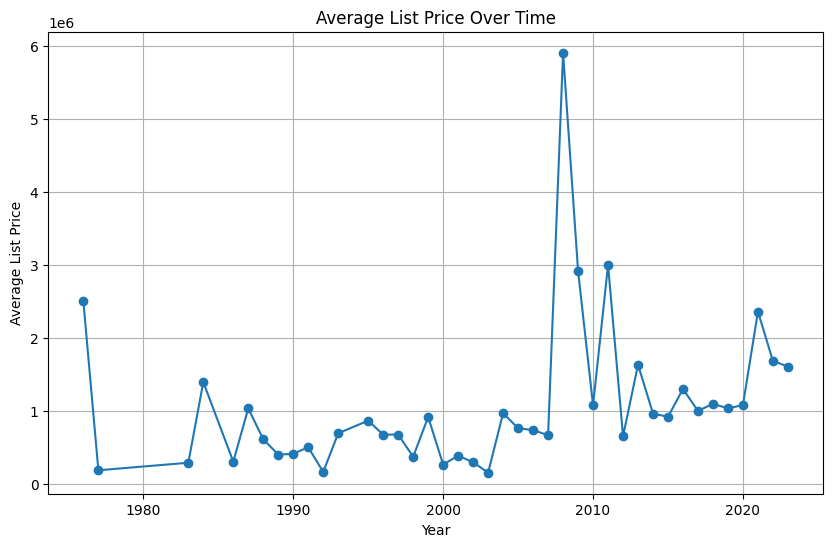

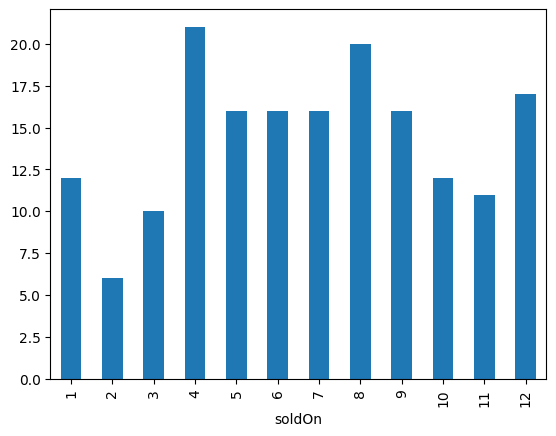

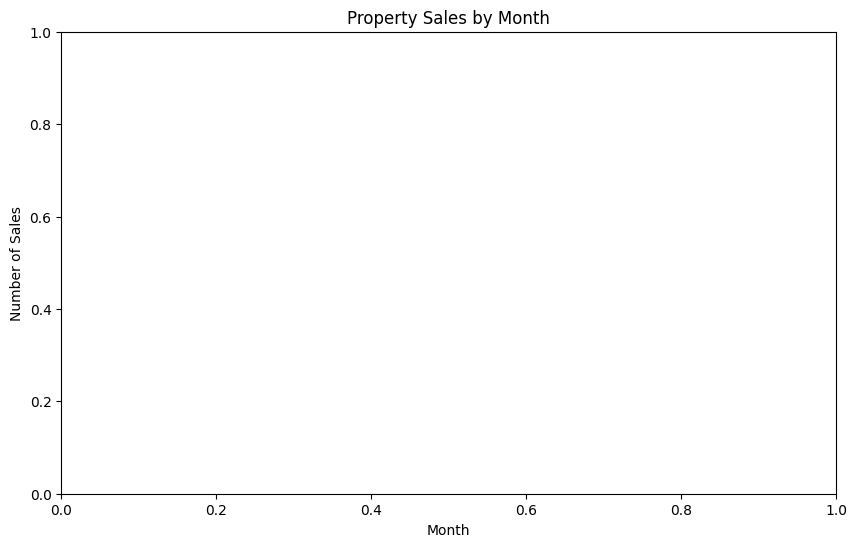

In [82]:
# Convert 'soldOn' to datetime
df['soldOn'] = pd.to_datetime(df['soldOn'])

# Line plot of average 'listPrice' over time
df_time = df.groupby(df['soldOn'].dt.year)['listPrice'].mean()
plt.figure(figsize=(10, 6))
df_time.plot(marker='o')
plt.title('Average List Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average List Price')
plt.grid(True)
plt.show()

# Seasonal patterns in sales
monthly_sales = df['soldOn'].dt.month.value_counts().sort_index()
monthly_sales.plot(kind='bar')
plt.title('Property Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

Conclusion: 

- Average listing price over time: 

    Further investigation in progress...(research economic events, policy changes, or market conditions around 2010 that could explain the spike, analyze price trends for different property types or locations to see if the spike in 2010 was uniform across all segments or specific to certain types or areas).

- Property sales by month:
    
    Upon analyzing the temporal trends in property sales, it is evident that the summer months (April, May, June, July, and August) experience higher and more consistent sales compared to other months. This trend is clearly visible in the bar chart, where the summer months are highlighted, showing a notable increase in the number of property transactions. This seasonal pattern suggests that the real estate market is more active during the summer, potentially due to favorable weather, school vacations, and other factors that encourage buying and selling activities during this period.

--------------------------------------------------------------------------------------------------

Feature Relationships:

- What is the correlation between different features (e.g., sqft, beds, baths) and listPrice?
- How does the age of a property (year_built) impact its price?
- Does having a garage (garage) or more stories (stories) significantly affect the listing price?

sqft          0.867725
beds          0.648201
baths         0.798377
year_built    0.235362
garage        0.534335
stories       0.547981
listPrice     1.000000
Name: listPrice, dtype: float64


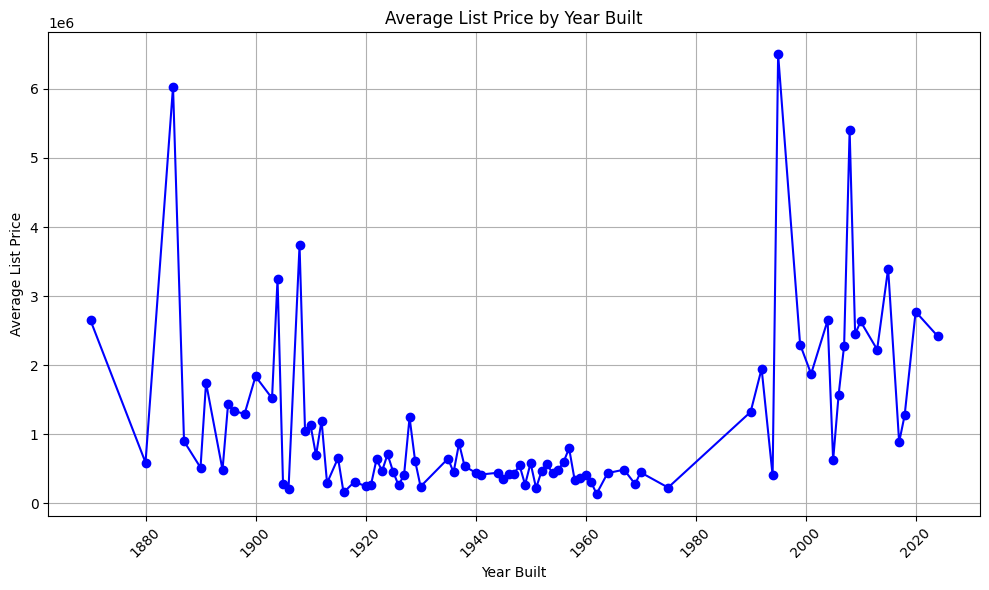

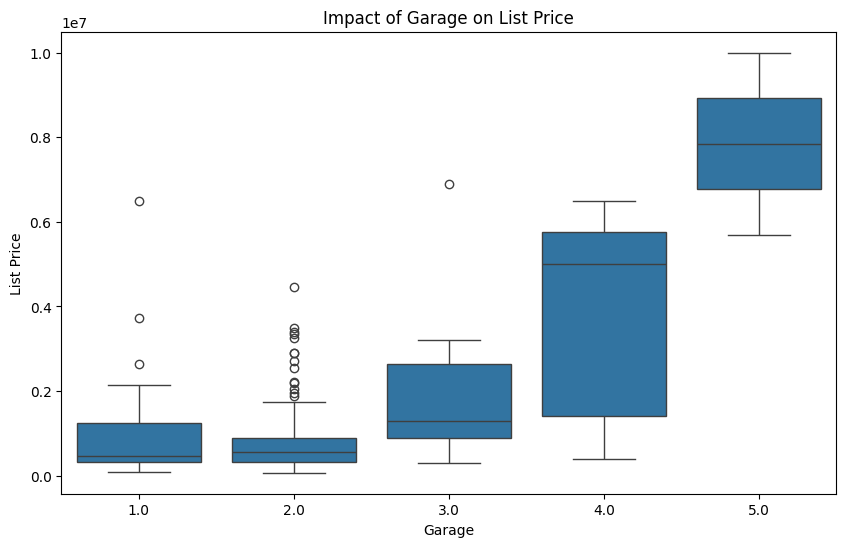

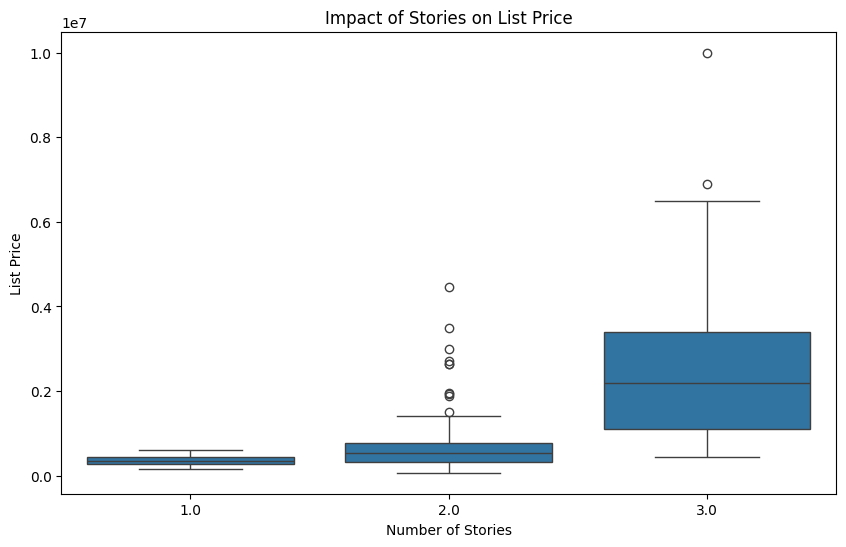

In [73]:
# Compute the correlation matrix
correlation_matrix = df[['sqft', 'beds', 'baths', 'year_built', 'garage', 'stories', 'listPrice']].corr()

# Print correlation with listPrice
print(correlation_matrix['listPrice'])


# Calculate average listPrice by year_built
avg_price_by_year_built = df.groupby('year_built')['listPrice'].mean()

# Plotting average listPrice by year_built
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year_built.index, avg_price_by_year_built.values, marker='o', linestyle='-', color='b')
plt.title('Average List Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average List Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Boxplot comparing listPrice for properties with and without garage
plt.figure(figsize=(10, 6))
sns.boxplot(x='garage', y='listPrice', data=df)
plt.title('Impact of Garage on List Price')
plt.xlabel('Garage')
plt.ylabel('List Price')
plt.show()

# Boxplot comparing listPrice for properties with different number of stories
plt.figure(figsize=(10, 6))
sns.boxplot(x='stories', y='listPrice', data=df)
plt.title('Impact of Stories on List Price')
plt.xlabel('Number of Stories')
plt.ylabel('List Price')
plt.show()

Conclusion:

- Correlation between different features:
    
    Based on the given correlation coefficients, sqft and baths have a stronger relationship. This implies larger properties tend to be listed at higher prices. As for bathrooms, higher demand in the market for properties with more bathrooms might drive up their prices.

- Average list price by year:
- Impact of # of garages and stories on list price:

--------------------------------------------------------------------------------------------------

Market Insights:

- How do listing prices compare to the prices at which properties were last sold?

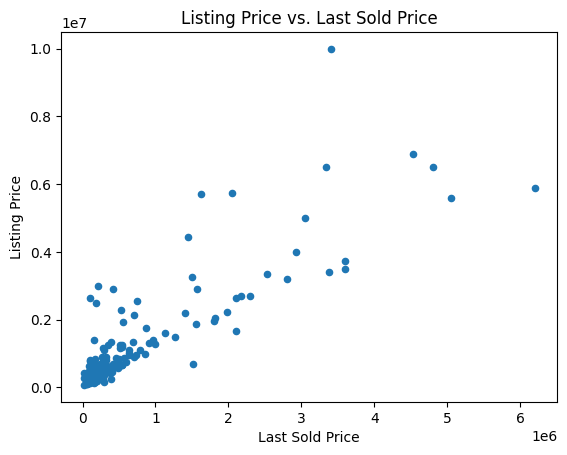

In [78]:
# Comparison of listing prices and last sold prices
price_comparison = df[['listPrice', 'lastSoldPrice']].dropna()
price_comparison.plot(kind='scatter', x='lastSoldPrice', y='listPrice')
plt.title('Listing Price vs. Last Sold Price')
plt.xlabel('Last Sold Price')
plt.ylabel('Listing Price')
plt.show()

Conclusions:

    

--------------------------------------------------------------------------------------------------

Text Analysis:

- What are the most common words used in property descriptions (text)?
- Are there specific words or phrases in descriptions that are associated with higher property prices?

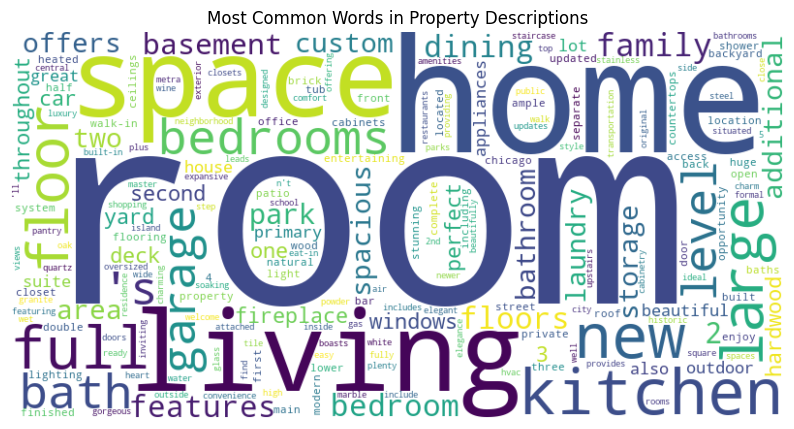

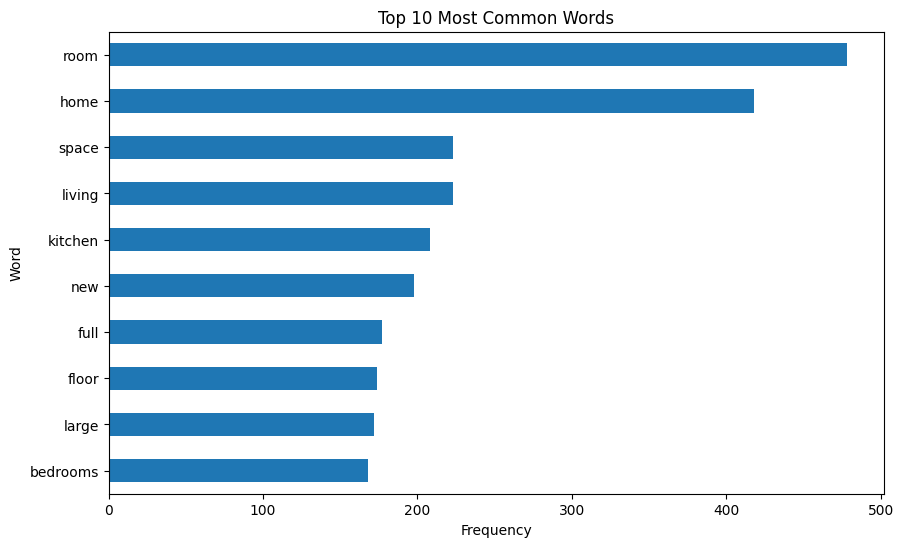

room        478
home        418
living      223
space       223
kitchen     208
new         198
full        177
floor       174
large       172
bedrooms    168
Name: count, dtype: int64


In [80]:
# Playing around with sentimental analysis tools in python (no proper conclusions)

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud

# Concatenate all descriptions into one string
text_data = ' '.join(df['text'].astype(str))

# Tokenization and cleaning
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
word_tokens = word_tokenize(text_data.lower())  # Convert to lowercase

filtered_tokens = [word for word in word_tokens if word not in stop_words and word not in punctuation]

# Count word frequencies
word_freq = pd.Series(filtered_tokens).value_counts()

# Visualize word frequencies using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Property Descriptions')
plt.show()

# Display top 10 most frequent words in a bar chart
top_n = 10
top_words = word_freq.head(top_n)

plt.figure(figsize=(10, 6))
top_words.sort_values().plot(kind='barh')
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Display exact numbers
print(top_words)

Conclusion: Words like "room," "living," "space," and "floor" suggest a focus on the living areas and floor plans of properties. Terms like "kitchen," "bedrooms," "full," and "large" highlight specific features that potential buyers or renters might prioritize. If "new" appears frequently, it may indicate a preference for newer properties or recent renovations.
    "Large" and "space" might indicate a preference for spacious properties.